In [7]:
import webber

from time import sleep
from typing import Union
from networkx import DiGraph

In [8]:
def print_and_wait(*values, sep=' ', end='\n', sleep_time: Union[int, float] = 0.0):
    print(*values, sep=sep, end=end)
    sleep(sleep_time)

In [9]:
def first():
    print("1")
    sleep(1)

def second():
    print("2")
    sleep(1)

def third():
    print("3")
    sleep(1)

def fourth():
    print("4")
    sleep(1)

In [10]:
dag = webber.DAG()
dag.add_node(first)
dag.add_node(second)
dag.add_node(third)
dag.add_node(fourth)
dag.execute()

2024-11-10 17:18:12,688          second: 2
2024-11-10 17:18:12,688          fourth: 4
2024-11-10 17:18:12,695           third: 3
2024-11-10 17:18:12,696           first: 1


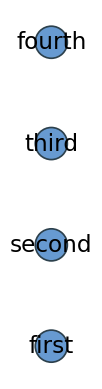

In [11]:
dag.visualize()

In [12]:
dag = webber.DAG()

ref_first, ref_sec = dag.add_edge(first, second)
_, ref_third = dag.add_edge(ref_sec, third)
_, ref_fourth = dag.add_edge(ref_third, fourth)

dag.execute()

2024-11-10 17:18:16,675           first: 1
2024-11-10 17:18:17,829          second: 2
2024-11-10 17:18:18,914           third: 3
2024-11-10 17:18:20,002          fourth: 4


In [13]:
dag = webber.DAG()

one_foo   = dag.add_node(print_and_wait, "Hello!", "This should be first!", sleep_time=1.0)
three_foo = dag.add_node(print_and_wait, "This is should be second -- or third?!    :-)","    Function B", end="\n\n", sleep_time=0.001)
two_foo   = dag.add_node(print_and_wait, "This is should be second -- or third?!    :-)","    Function A", end="\n", sleep_time=0.1)
four_foo  = dag.add_node(print_and_wait, "I'll show up last.")

dag.add_edge(one_foo, two_foo)
dag.add_edge(one_foo, three_foo)
dag.add_edge(three_foo, four_foo)

dag.execute()

2024-11-10 17:18:21,527  print_and_wait: Hello!
2024-11-10 17:18:21,627  print_and_wait: This should be first!
2024-11-10 17:18:22,681  print_and_wait: This is should be second -- or third?!    :-)
2024-11-10 17:18:22,681  print_and_wait: This is should be second -- or third?!    :-)
2024-11-10 17:18:22,746  print_and_wait:     Function B
2024-11-10 17:18:22,763  print_and_wait:     Function A
2024-11-10 17:18:22,992  print_and_wait: I'll show up last.


In [ ]:
G = DiGraph([
    (first, second),
    (second, third),
    (third, fourth)
])
dag = webber.DAG(G)
dag.visualize()

In [ ]:
dag.visualize('plt')